<a href="https://colab.research.google.com/github/saatvik1879/mlprepcamp/blob/main/saatvik_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1 - CodeRunner: Regression Rumble

Gradient Decent algorithm is used to optimise our model parameters.

The main idea is that we propagate opposite the direction of the gradient of the cost function at a given hyper parameter w or b.

To understand better, let us get our hands dirty! Below is the code implemented for the linear regression algorithm.

* We generate a regression data using the skikit_learns inbuilt library.
* We generate random weight matrices using the np.random.randn function
* Apply the GD Algorithm
 * Calculate the output of the model.
 * Calculate the error. (Used in the MSE Cost function)
 * Compute the gradient of the Cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "..."

Note:- Use the Mean Square error as your cost function given as:

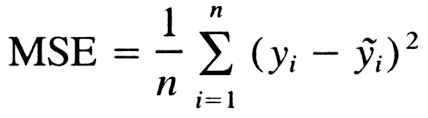

ybar is the predicted output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [3]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn(2,1)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        predictions = theta[0][0] + theta[1][0]*X[:,0]

        # Calculate the error: use the mse function
        error = (((predictions-y)**2).sum())/m

        # Calculate the gradients: 1/m * X.T * error
        gradients = np.array([[(predictions-y).sum()*learning_rate*(1/m)],[((predictions-y)*X[:,0]).sum()*learning_rate*(1/m)]])

        # Update parameters: Apply the GD algorithm
        theta -= gradients

        # Calculate the cost function: MSE
        cost = (((predictions-y)**2).sum())/m
        cost_history.append(cost)

    return theta, cost_history



In [4]:
# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 2000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

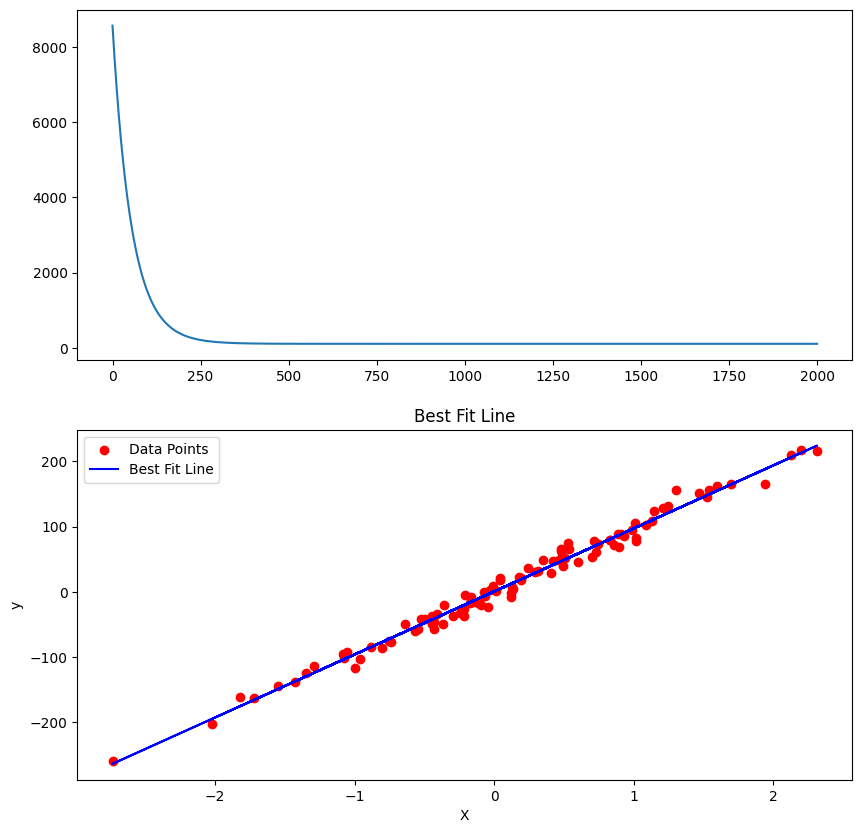

In [6]:
plt.figure(figsize=(10,10))
# Plot the cost function over iterations
plt.subplot(2,1,1)
plt.plot(cost_history)

# Plot the best fit line
plt.subplot(2,1,2)
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, theta[0][0] + theta[1][0]*X[:,0], color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

##Question 2 - CodeRunner: Regression Rumble II

The Logistic Regression algorithm is similar to Linear Regression minus the introdiction of a sigmoid activation function.

We also use the Binary Cross Entropy Cost function istead of MSE.

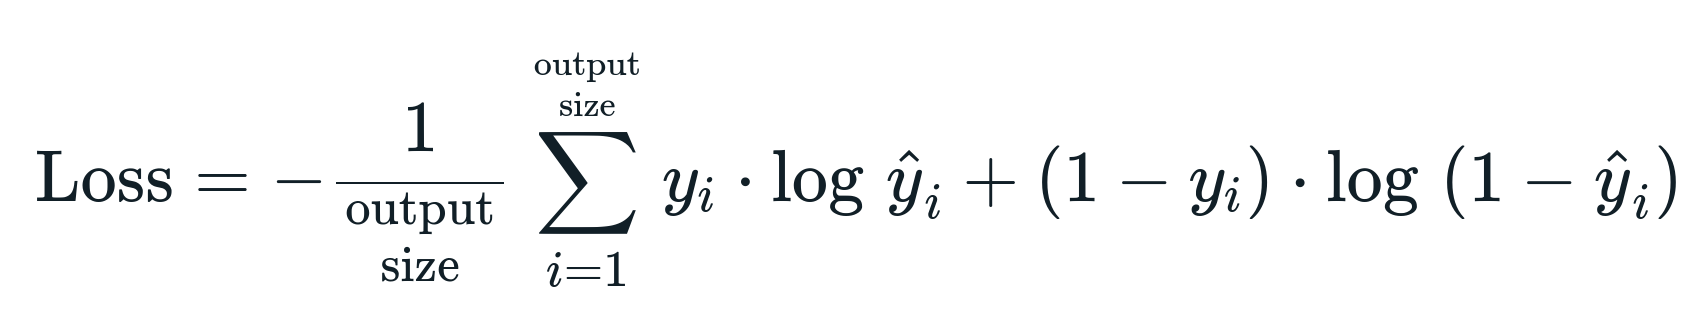


In [ ]:
# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

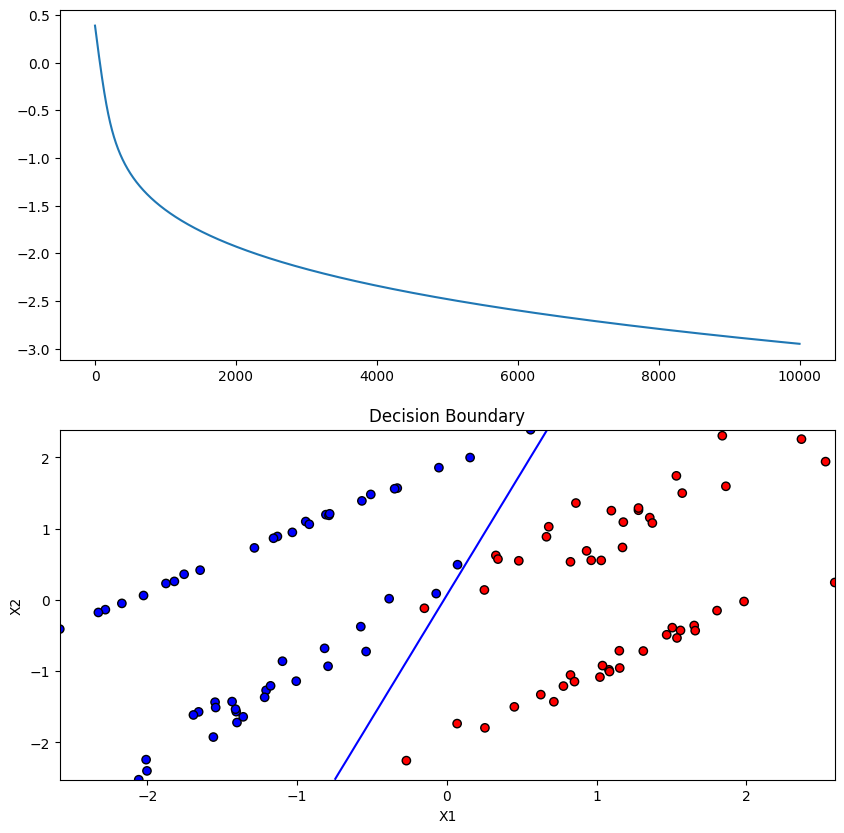

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math

mathlog = np.vectorize(math.log)
def sigmoid(z):
    # Sigmoid function
    return 1/(1+(2.718281828459045**(-z)))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta = np.random.randn(3,1)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        predictions = sigmoid(theta[0][0] + theta[1][0]*X[:,0] + theta[2][0]*X[:,1])

        # Calculate the error: y_pred - y
        error = predictions - y

        # Calculate the gradients:
        gradients = np.array([[(predictions-y).sum()*learning_rate*(1/m)],[((predictions-y)*X[:,0]).sum()*learning_rate*(1/m)],[((predictions-y)*X[:,1]).sum()*learning_rate*(1/m)]])


        # Update parameters:
        theta -= gradients

        # Calculate the cost function: log loss
        cost = -((1/(m))*(((y*mathlog(predictions))+((1-y)*(1-mathlog(predictions)))).sum()))
        cost_history.append(cost)

    return theta, cost_history

# Generate random classification data using scikit-learn
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 10000

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(cost_history)
# Plot the decision boundary
plt.subplot(2,1,2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(theta[0]+np.dot(grid, theta[1:])).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()